In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import scipy.stats as st
from scipy.stats import mannwhitneyu

### Import Data

In [3]:
data=r"C:\Users\rafipriyahutama\OneDrive\Documents\Purwadhika\Module_two\Capstone\dataset\Supermarket Customers.csv"
df=pd.read_csv(data, sep="\t")
df


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

### Data Cleaning

**Neutralizing Column Names**

In [5]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(r"\s+", "_", regex=True)
)


Converting dt_customer to date time format

In [6]:
df['dt_customer'] = (
    df['dt_customer']
    .replace(['', ' ', 'NA', 'NaN', 'NULL', 'Unknown'], pd.NA)
)

df['dt_customer'] = pd.to_datetime(df['dt_customer'], format='%d-%m-%Y', errors='coerce')

df['dt_customer'].isna().sum()

np.int64(0)

**Checking the normality of dt_customer column**

In [7]:
df['thn_dftr_cust'] = df['dt_customer'].dt.year
print(df['thn_dftr_cust'].describe())

count    2240.000000
mean     2013.028125
std         0.684554
min      2012.000000
25%      2013.000000
50%      2013.000000
75%      2013.000000
max      2014.000000
Name: thn_dftr_cust, dtype: float64


Data bisa disimpulkan normal. Customer mendaftar pada rentang 2012-2014

**Checking the normality of year_birth**

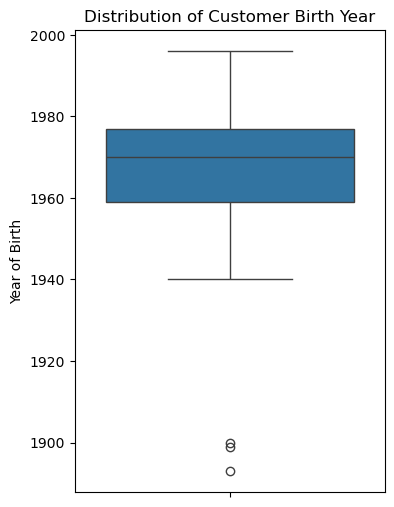

In [8]:
plt.figure(figsize=(4,6))
sns.boxplot(y=df['year_birth'])
plt.title('Distribution of Customer Birth Year')
plt.ylabel('Year of Birth')
plt.show()

ada beberapa data outlier, mereka yang lahir di kitaran tahun 1990an. 

In [9]:
Q1 = df['year_birth'].quantile(0.25)
Q3 = df['year_birth'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


Lower bound: 1932.0
Upper bound: 2004.0


mereka yang lahir di bawah 1932 dapat kita kategorikan sebagai data error.

In [10]:
outlier_lahir = df[(df['year_birth'] < lower_bound) | (df['year_birth'] > upper_bound)]
print(outlier_lahir[['year_birth']])

     year_birth
192        1900
239        1893
339        1899


Ada tiga data yang lahir jauh di bawah lower bound. Karena tidak ada kolom lain yang bisa membantu untuk memperbaiki data ini, saya akan mendrop data ini.

In [11]:
#drop outlier
df = df.drop(outlier_lahir.index)


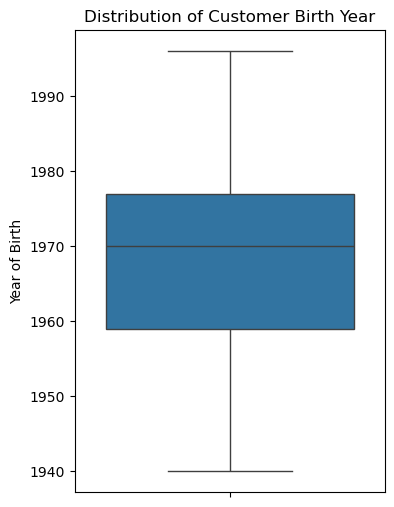

In [12]:
#checking once again
plt.figure(figsize=(4,6))
sns.boxplot(y=df['year_birth'])
plt.title('Distribution of Customer Birth Year')
plt.ylabel('Year of Birth')
plt.show()

**Checking the consistency of marital status and converting it to household type**

In [13]:
df['marital_status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [14]:
df['marital_status'] = (
    df['marital_status']
    .str.strip()
    .str.title()
    .replace({
        'Yolo': 'Single',
        'Alone': 'Single',
        'Together': 'Married',
        'Widow': 'Divorced',
        'Absurd': 'Single'  
    })
)

In [15]:
df['total_kids'] = df['kidhome'] + df['teenhome']
def household_type(row):
    if row['total_kids'] > 0:
        if row['marital_status'] in ['Single', 'Divorced', 'Absurd']:
            return 'Single Parent'
        elif row['marital_status'] in ['Married', 'Together']:
            return 'Family'
    else:
        if row['marital_status'] in ['Married', 'Together']:
            return 'Couple'
        else:
            return 'Single'
df['household_type'] = df.apply(household_type, axis=1)  #memanggil fungsi apply dan menerapkannya ke setiap baris dalam dataframe
df['household_type'].unique()

array(['Single', 'Single Parent', 'Couple', 'Family'], dtype=object)

**Checking the consistency of Education**

In [16]:
df['education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [17]:
df['education']=(
    df['education']
    .str.strip()
    .str.title()
    .replace({
        'Graduation':'Bachelor',
        '2N Cycle':'Master',
        'Phd':'Doctorate'
    })

)
print(df['education'].unique())

['Bachelor' 'Doctorate' 'Master' 'Basic']


**Checking and Handling Missing Values**

In [18]:
df.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
thn_dftr_cust           0
total_kids              0
household_type          0
dtype: int64

Prosentase missing values dari kolom income

In [19]:
persen_income_kosong=(df['income'].isna().sum()/len(df['income'])*100).round(2)
persen_income_kosong

np.float64(1.07)

Mencari pattern orang yang tidak mengisi income

In [20]:
df['income_missing'] = df['income'].isna()
income_hilang=df[df['income_missing']==True]
income_hilang

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,thn_dftr_cust,total_kids,household_type,income_missing
10,1994,1983,Bachelor,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,3,11,0,2013,1,Family,True
27,5255,1986,Bachelor,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,3,11,0,2013,1,Single Parent,True
43,7281,1959,Doctorate,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,3,11,0,2013,0,Single,True
48,7244,1951,Bachelor,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,3,11,0,2014,3,Single Parent,True
58,8557,1982,Bachelor,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,3,11,0,2013,1,Single Parent,True
71,10629,1973,Master,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,3,11,0,2012,1,Family,True
90,8996,1957,Doctorate,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,3,11,0,2012,3,Family,True
91,9235,1957,Bachelor,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,3,11,0,2014,2,Single Parent,True
92,5798,1973,Master,Married,NaN,0,0,2013-11-23,87,445,...,0,0,0,3,11,0,2013,0,Couple,True
128,8268,1961,Doctorate,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,3,11,0,2013,1,Family,True


Cek hubungan data hilang dengan total spending
Asumsi: Orang yang tidak mengisi income adalah orang yang high spender.

In [21]:
df['total_spending'] = df[['mntwines', 'mntfruits', 'mntmeatproducts',
                           'mntfishproducts', 'mntsweetproducts', 'mntgoldprods']].sum(axis=1)


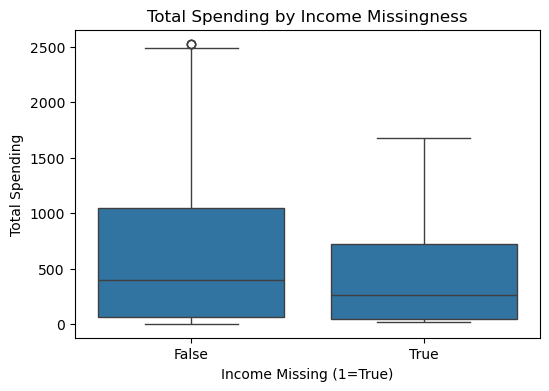

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(x='income_missing', y='total_spending', data=df)
plt.title('Total Spending by Income Missingness')
plt.xlabel('Income Missing (1=True)')
plt.ylabel('Total Spending')
plt.show()

Kesimpulan: Asumsi salah. Tidak ada hubungan signifikan antara kumpulan orang income hilang dengan aktivitas pembelian.

marital_status
Single      0.018519
Married     0.009702
Divorced    0.003247
Name: income_missing, dtype: float64


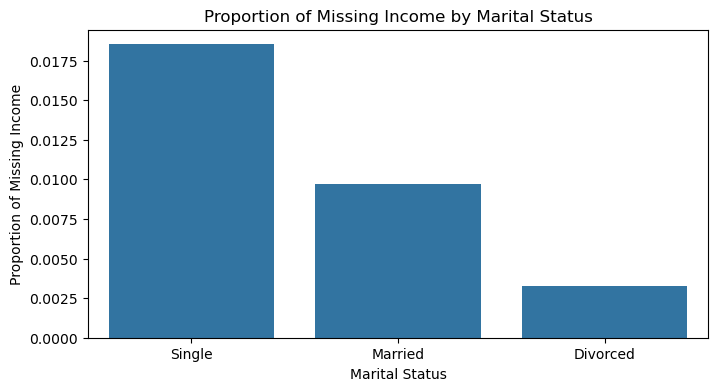

In [23]:
missing_by_marital = df.groupby('marital_status')['income_missing'].mean().sort_values(ascending=False)
print(missing_by_marital)

# Visualize
plt.figure(figsize=(8,4))
sns.barplot(x=missing_by_marital.index, y=missing_by_marital.values)
plt.title('Proportion of Missing Income by Marital Status')
plt.ylabel('Proportion of Missing Income')
plt.xlabel('Marital Status')
plt.show()

Mencari sebaran tingkat pendidikan orang yang tidak mengisi income.

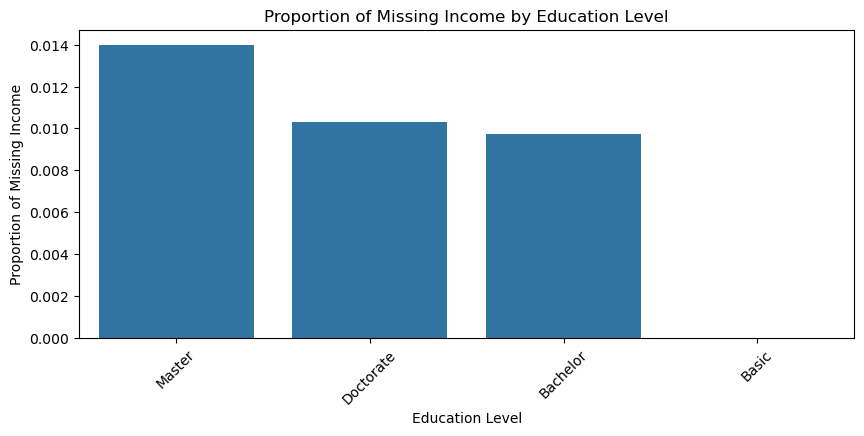

In [24]:
missing_by_education=df.groupby('education')['income_missing'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,4))
sns.barplot(x=missing_by_education.index, y=missing_by_education.values)
plt.title('Proportion of Missing Income by Education Level')
plt.ylabel('Proportion of Missing Income')
plt.xlabel('Education Level')
plt.xticks(rotation=45)
plt.show()

Asumsi salah. Tidak ada hubungan signifikan antara kumpulan orang income hilang dengan tingkat pendidikan. Mereka yang tidak mengisi income tersebar di semua tingkat pendidikan, kecuali Basic.

kesimpunan: tidak ada pattern yang jelas mengapa seorang tidak mengisi income. Data missing ini termasuk kategori MCAR (Missing Completely at Random). Karena itu, saya akan mengisi missing value ini dengan median income.

In [25]:
df['income'] = df['income'].fillna(df['income'].median())
df['income'].isna().sum()

np.int64(0)

In [26]:
df = df.drop(columns='income_missing')

**Checking Normalcy of income Distribution**

In [27]:
Q1 = df['income'].quantile(0.25)
Q3 = df['income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): {Q1:,.2f}")
print(f"Q3 (75th percentile): {Q3:,.2f}")
print(f"IQR (Q3 - Q1): {IQR:,.2f}")
print(f"Lower bound: {lower_bound:,.2f}")
print(f"Upper bound: {upper_bound:,.2f}")

Q1 (25th percentile): 35,523.00
Q3 (75th percentile): 68,281.00
IQR (Q3 - Q1): 32,758.00
Lower bound: -13,614.00
Upper bound: 117,418.00


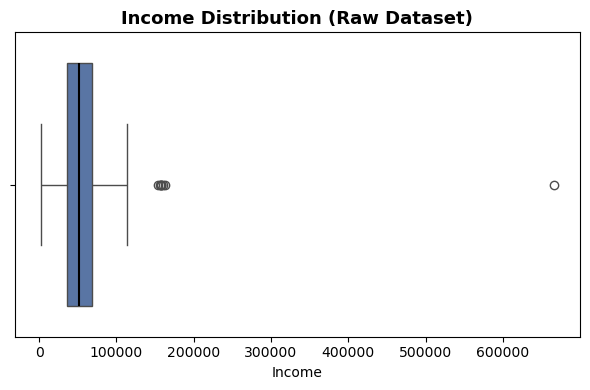

In [28]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df['income'],
    color='#4C72B0',
    medianprops={'color': 'black', 'linewidth': 1.5}
)
plt.title('Income Distribution (Raw Dataset)', fontsize=13, weight='bold')
plt.xlabel('Income')
plt.tight_layout()
plt.show()

In [29]:
outliers = df[df['income'] > upper_bound]
print("\nOutlier(s) found:")
display(outliers[['id', 'income']].sort_values(by='income', ascending=False).head())


Outlier(s) found:


,id,income
2233,9432,666666.0
617,1503,162397.0
687,1501,160803.0
1300,5336,157733.0
164,8475,157243.0


Setelah mengecek sebaran data, 

In [30]:
income_error=df[df['income'] == 666666.0].index
df.drop(income_error, inplace=True)


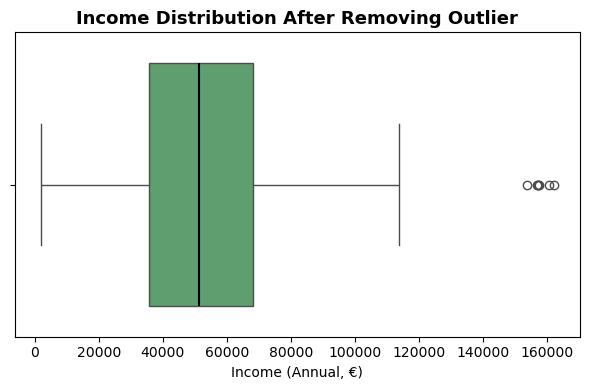

In [31]:
plt.figure(figsize=(6,4))
sns.boxplot(
    x=df['income'],
    color='#55A868',
    medianprops={'color': 'black', 'linewidth': 1.5}
)

plt.title('Income Distribution After Removing Outlier', fontsize=13, weight='bold')
plt.xlabel('Income (Annual, €)')
plt.tight_layout()
plt.show()

**Checking Duplicate ID**

In [32]:
df['id'].duplicated().sum()

np.int64(0)

Checking Anomaly on purchase columns

In [33]:
# Checking number of missing purchase
df[
    (df['numwebpurchases'] == 0) &
    (df['numcatalogpurchases'] == 0) &
    (df['numstorepurchases'] == 0) &
    (df['total_spending'] > 0)
].count()


id                     6
year_birth             6
education              6
marital_status         6
income                 6
kidhome                6
teenhome               6
dt_customer            6
recency                6
mntwines               6
mntfruits              6
mntmeatproducts        6
mntfishproducts        6
mntsweetproducts       6
mntgoldprods           6
numdealspurchases      6
numwebpurchases        6
numcatalogpurchases    6
numstorepurchases      6
numwebvisitsmonth      6
acceptedcmp3           6
acceptedcmp4           6
acceptedcmp5           6
acceptedcmp1           6
acceptedcmp2           6
complain               6
z_costcontact          6
z_revenue              6
response               6
thn_dftr_cust          6
total_kids             6
household_type         6
total_spending         6
dtype: int64

In [34]:
df[
    (df['numwebpurchases'] == 0) &
    (df['numcatalogpurchases'] == 0) &
    (df['numstorepurchases'] == 0) &
    (df['total_spending'] > 0)
].describe()


,id,year_birth,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,...,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,thn_dftr_cust,total_kids,total_spending
count,6.000000,6.000000,6.000000,6.000000,6.000000,6,6.000000,6.000000,6.000000,6.00000,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.000000,6.00000,6.000000
mean,8099.000000,1966.000000,54160.666667,0.333333,0.166667,2014-01-22 20:00:00,56.000000,2.166667,0.833333,1.50000,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013.666667,0.50000,7.000000
min,3955.000000,1949.000000,1730.000000,0.000000,0.000000,2013-04-13 00:00:00,20.000000,1.000000,0.000000,1.00000,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013.000000,0.00000,5.000000
25%,5881.750000,1963.500000,3632.250000,0.000000,0.000000,2013-10-08 12:00:00,35.750000,1.250000,1.000000,1.00000,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2013.250000,0.00000,6.000000
50%,8396.500000,1968.000000,4442.000000,0.000000,0.000000,2014-03-29 00:00:00,60.500000,2.000000,1.000000,1.00000,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014.000000,0.00000,7.000000
75%,10815.250000,1972.500000,116658.250000,0.750000,0.000000,2014-06-13 06:00:00,77.000000,2.000000,1.000000,1.75000,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014.000000,0.75000,8.000000
max,11181.000000,1975.000000,156924.000000,1.000000,1.000000,2014-06-23 00:00:00,85.000000,5.000000,1.000000,3.00000,...,0.0,0.0,0.0,0.0,3.0,11.0,0.0,2014.000000,2.00000,9.000000
std,3069.068588,9.528903,78450.676764,0.516398,0.408248,NaN,26.728262,1.471960,0.408248,0.83666,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.516398,0.83666,1.549193


In [35]:
mask_anomaly = (
    (df['numwebpurchases'] == 0) &
    (df['numcatalogpurchases'] == 0) &
    (df['numstorepurchases'] == 0) &
    (df['total_spending'] > 0)
)
anomalies = df.loc[mask_anomaly, ['id', 'total_spending', 'recency', 
                                 'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']]

print(f"Anomalous customers: {len(anomalies)}")
display(anomalies)




Anomalous customers: 6


,id,total_spending,recency,numwebpurchases,numcatalogpurchases,numstorepurchases
655,5555,6,81,0,0,0
981,3955,6,20,0,0,0
1245,6862,8,65,0,0,0
1524,11110,5,56,0,0,0
1846,9931,9,29,0,0,0
2132,11181,8,85,0,0,0


In [36]:
df = df.loc[mask_anomaly == False].reset_index(drop=True)

In [37]:
remaining_anomalies = df[
    (df['numwebpurchases'] == 0) &
    (df['numcatalogpurchases'] == 0) &
    (df['numstorepurchases'] == 0) &
    (df['total_spending'] > 0)
]

print(f"Remaining anomalies after drop: {len(remaining_anomalies)}")

Remaining anomalies after drop: 0


### Customer Segmentation using RFM Analysis

Profiling Customer Segmentation by Retention, Frequency, Monetary (RFM)

In [38]:
freq_cols = ['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']
df['frequency'] = df[freq_cols].sum(axis=1)
df['frequency'].head()

0    22
1     4
2    20
3     6
4    14
Name: frequency, dtype: int64

In [39]:
df=df.rename(columns={'total_spending':'monetary'})

Recency = df['recency']  
Monetary = df['total_spending']  
Frequency = df['frequency']

In [40]:
klaster_k=['recency', 'frequency', 'monetary']
df_k_klaster=df[klaster_k]
df_k_klaster.describe()

,recency,frequency,monetary
count,2230.000000,2230.000000,2230.000000
mean,49.097758,12.580269,607.598206
std,28.966377,7.186771,601.870723
min,0.000000,1.000000,8.000000
25%,24.000000,6.000000,69.000000
50%,49.000000,12.000000,397.500000
75%,74.000000,18.000000,1047.750000
max,99.000000,32.000000,2525.000000


Basis Konseptual:
- Recency: waktu sejak pembelian terakhir (semakin kecil semakin baik) 
- Frequency: jumlah pembelian dalam dua tahun terakhir (semakin besar semakin baik) 
- Monetary: jumlah uang yang dibelanjakan dalam dua tahun terakhir (semakin besar semakin baik)

Sebelum melakukan klastering atau segmentasi, saya akan melihat sekali lagi sebaran data untuk memastikan data normal dan mengecek apakah ada kejanggalan dalam data

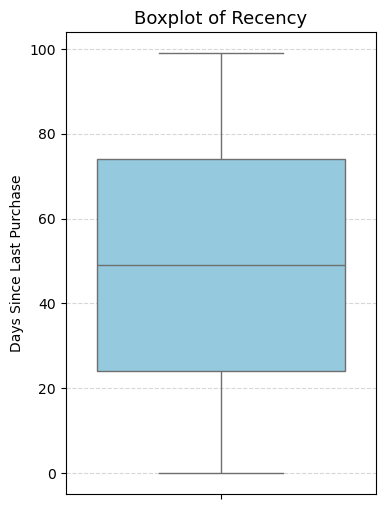

In [41]:
#Boxplot recency
plt.figure(figsize=(4,6))
sns.boxplot(y=df['recency'], color='skyblue')
plt.title('Boxplot of Recency', fontsize=13)
plt.ylabel('Days Since Last Purchase')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


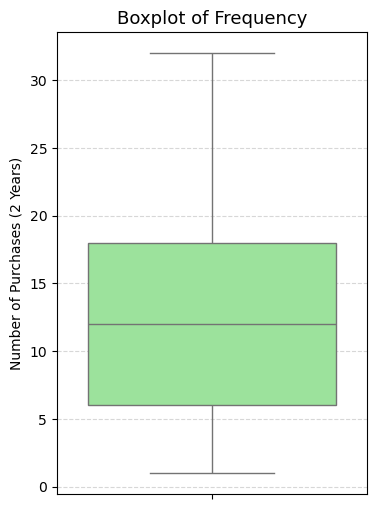

In [42]:
#Boxplot Frequency
plt.figure(figsize=(4,6))
sns.boxplot(y=df['frequency'], color='lightgreen')
plt.title('Boxplot of Frequency', fontsize=13)
plt.ylabel('Number of Purchases (2 Years)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


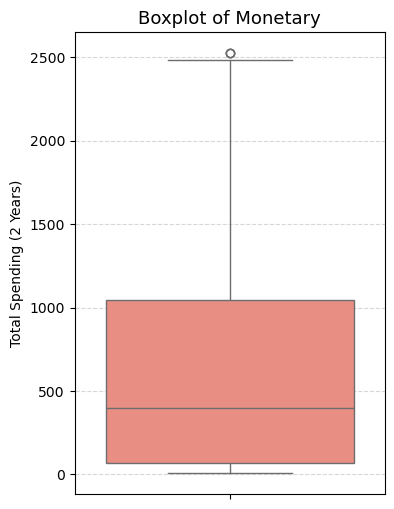

In [43]:
#boxplot monetary
plt.figure(figsize=(4,6))
sns.boxplot(y=df['monetary'], color='salmon')
plt.title('Boxplot of Monetary', fontsize=13)
plt.ylabel('Total Spending (2 Years)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


In [44]:
Q1 = df['monetary'].quantile(0.25)
Q3 = df['monetary'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
outliers = df[df['monetary'] > upper_bound]

print(f"Upper bound: {upper_bound:.2f}")
print(f"Number of outliers: {len(outliers)}")

outliers[['id', 'monetary', 'frequency', 'recency']].sort_values(by='monetary', ascending=False).head()


Upper bound: 2515.88
Number of outliers: 3


,id,monetary,frequency,recency
1174,5735,2525,17,29
1565,5350,2525,17,29
1486,1763,2524,28,62


Dapat dilihat, dalam boxplot recency dan frequency, data terdistribusi normal. Namun, dalam boxplot monetary, ada beberapa data outlier. Saya memutuskan untuk tidak menghapus atau mengubah data outlier ini karena data mereka saya nilai sebagai data yang valid (inputan data tidak terisi 9999 atau hal lain yang bisa diasumsikan tidak valid). Selain itu, dalam analisis rfm data outlier ini nantinya bisa saya kategorikan sebagai high value customer yang nantinya berguna bagi analisis.

**Create RFM Segmentation**

In [45]:
#Assigning Score using Statistical (quartiles) Approach
#Menggunakan 4 nilai agar lebih mudah dikategorikan dan dimengerti, melihat data yang jumlahnya tidak terlalu besar.
#Recency, semakin kecil semakin baik.
df['r_score']=pd.qcut(df['recency'],4,labels=[4,3,2,1]).astype(int)
#frequency, semakin besar semakin baik.
df['f_score']=pd.qcut(df['frequency'],4,labels=[1,2,3,4]).astype(int)
#monetary, semakin besar semakin baik.
df['m_score']=pd.qcut(df['monetary'],4,labels=[1,2,3,4]).astype(int)
#total score
df['rfm_score']=df['r_score']+df['f_score']+df['m_score']

#Labeling Segment using Rule Based Approach
def total_score_rfm(score):
    if score >=10:
        return 'High-Value Customers'
    elif score >=8:
        return 'Engaged Customers'
    elif score  >=5:
        return 'Casual Customers'
    else:
        return 'Dormant Customers'
df['segment']=df['rfm_score'].apply(total_score_rfm)

In [46]:
segment_pct = df['segment'].value_counts(normalize=True) * 100
segment_pct

segment
Casual Customers        35.246637
Engaged Customers       27.130045
High-Value Customers    24.080717
Dormant Customers       13.542601
Name: proportion, dtype: float64

C:\Users\rafipriyahutama\AppData\Local\Temp\ipykernel_24476\3569446320.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


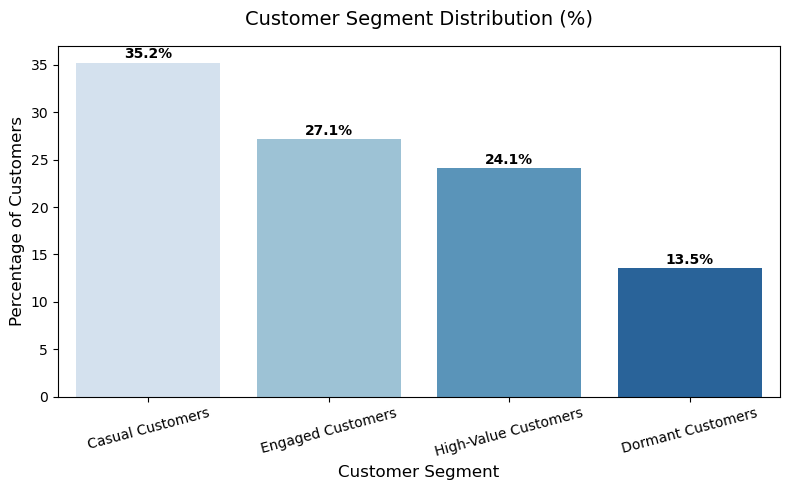

In [47]:
plt.figure(figsize=(8,5))

sns.barplot(
    x=segment_pct.index,
    y=segment_pct.values,
    palette='Blues'
)

plt.title('Customer Segment Distribution (%)', fontsize=14, pad=15)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Percentage of Customers', fontsize=12)

# Add percentage labels
for i, v in enumerate(segment_pct.values):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontweight='bold')

plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


Insight:  
-Proporsi terbesar customer adalah casual customer (tier 3). Kuantitasnya yang besar membuat casual customer menjadi segemen, yang menurut saya, paling penting untuk dijaga dan dipertahankan. Mereka besar tapi rawan.



-Proporsi paling kecil dipegang oleh dormant customer (tier 4). Pada tahap ini saya belum bisa menyimpulkan mau diapakan kelompok ini. Saya butuh data tambahan untuk menentukan strategi yang tepat.   




In [48]:
segment_pct

segment
Casual Customers        35.246637
Engaged Customers       27.130045
High-Value Customers    24.080717
Dormant Customers       13.542601
Name: proportion, dtype: float64

### Data Analysis

Pertama, saya akan menganalisa tingkat penerimaan campaign di masing-masing segmen

In [49]:
df.rename(columns={'response': 'last_campaign_response'}, inplace=True)
campaign_kol=['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','last_campaign_response']
df['total_campaign_accept'] = df[campaign_kol].sum(axis=1)
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,total_kids,household_type,monetary,frequency,r_score,f_score,m_score,rfm_score,segment,total_campaign_accept
0,5524,1957,Bachelor,Single,58138.0,0,0,2012-09-04,58,635,...,0,Single,1617,22,2,4,4,10,High-Value Customers,1
1,2174,1954,Bachelor,Single,46344.0,1,1,2014-03-08,38,11,...,2,Single Parent,27,4,3,1,1,5,Casual Customers,0
2,4141,1965,Bachelor,Married,71613.0,0,0,2013-08-21,26,426,...,0,Couple,776,20,3,4,3,10,High-Value Customers,0
3,6182,1984,Bachelor,Married,26646.0,1,0,2014-02-10,26,11,...,1,Family,53,6,3,1,1,5,Casual Customers,0
4,5324,1981,Doctorate,Married,58293.0,1,0,2014-01-19,94,173,...,1,Family,422,14,1,3,3,7,Casual Customers,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2225,10870,1967,Bachelor,Married,61223.0,0,1,2013-06-13,46,709,...,1,Family,1341,16,3,3,4,10,High-Value Customers,0
2226,4001,1946,Doctorate,Married,64014.0,2,1,2014-06-10,56,406,...,3,Family,444,15,2,3,3,8,Engaged Customers,1
2227,7270,1981,Bachelor,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,Single,1241,18,1,3,4,8,Engaged Customers,1
2228,8235,1956,Master,Married,69245.0,0,1,2014-01-24,8,428,...,1,Family,843,21,4,4,3,11,High-Value Customers,0


Response rate formula= number of customer who accepted/total customer in segment *100%

In [50]:
df['responded'] = (df['total_campaign_accept'] > 0).astype(int) #Melihat apakah customer PERNAH merespon campaign atau tida
response_rate = (
    df.groupby('segment')['responded']
    .mean()       
    .mul(100)      
    .round(2)
)

response_rate



segment
Casual Customers        16.92
Dormant Customers        6.95
Engaged Customers       32.89
High-Value Customers    47.49
Name: responded, dtype: float64

C:\Users\rafipriyahutama\AppData\Local\Temp\ipykernel_24476\3341156554.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=response_rate.index, y=response_rate.values, palette='Blues')


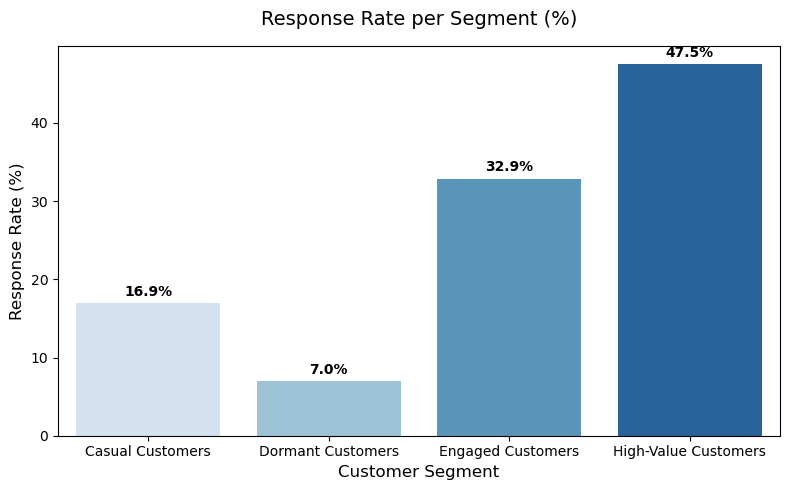

In [51]:
plt.figure(figsize=(8,5))
sns.barplot(x=response_rate.index, y=response_rate.values, palette='Blues')

plt.title('Response Rate per Segment (%)', fontsize=14, pad=15)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Response Rate (%)', fontsize=12)

for i, v in enumerate(response_rate.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()



Insight:
- Segment Dominan != Basis kuat yang responsif.  
    Bisa dilihat, kendati casual customer (tier 3) adalah segemen dominan, mereka bukanlah basis yang responsif terhadap campaign. Artinya, kendati besar, keterikatan mereka terhadap brand supermarket masih rendah. Ini tentu berbahaya. Mereka berpotensi turun peringkat ke tier 4 (dormant customer) bila (1) tidak ada upaya peningkatan loyalitas dan (2) ada kompetitor yang lebih menguntungkan. (kesimpulan: besar tapi rapuh)

-Proteksi High-Value Customer (tier_1)
    Kendati proporsinya sedikit, high-value customer (tier 1) memiliki tingkat responsifitas paling tinggi. Campaign selanjutnya, terkhusus pada segemen ini, harus dipersonalisasi untuk meproteksi mereka agar engagementnya tetap terjaga.

-Melepas Dormant (tier 4)
    Lagi-lagi, selain proporsi jumlah mereka yang kecil, tingkat responsifitas dormant customer juga paling rendah. Dengan sumber daya yang terbatas, saya menyarankan untuk melepas segmen ini dan fokus saja ke segmen yang potensial.  






Kesimpulan sementara yang bisa menjadi basis dari analisa lanjutan:  
-Struktur pelanggan rapuh:  
    Secara proporsional, superstore ini memang sudah cukup baik--kelompok dormant proporsinya paling kecil. Namun, sustainability struktur customer ini masih rawan. Basis terbesar ditempati oleh kelompok casual (tier 3), dan mereka adalah kelompok yang tidak responsif  (tingkat responsifitasnya hanya 16.9%). Langkah selanjutnya kita harus membuat strategi yang terpersonalisasi dengan harapan mereka bisa berpindah ke tier 2.  
-Trade off antara menjaga 'mesin' dan membuang 'beban':
    Pada campagin selanjutnya, kita harus menjaga high-value customer (tier 1) agar score rfm mereka naik. Lantas, bagaimana dengan dorman customer (tier4)? Untuk semementara waktu, dengan sumber daya yang terbatas, kita bisa melepas mereka. Trade off adalah hal yang wajar dalam ekonomi, dan keputusan ini harus dipilih. 

Pada tahap selanjutnya, saya akan melakukan anlisis kembali untuk casual customer. tujuannya agar bisa membuat strategi campaign yang terpersonalisasi untuk mereka.

Mencari umur customer

In [52]:
anal_year = df['thn_dftr_cust'].max()
df['year_birth'] = pd.to_datetime(df['year_birth'], format='%Y', errors='coerce')
df['birth_year'] = df['year_birth'].dt.year
df['age'] = anal_year - df['birth_year']
df[['birth_year', 'age']].head()

,birth_year,age
0,1957,57
1,1954,60
2,1965,49
3,1984,30
4,1981,33


In [53]:
df.groupby('segment')['age'].describe().round(1)

,count,mean,std,min,25%,50%,75%,max
segment,,,,,,,,
Casual Customers,786.0,43.8,11.1,22.0,36.0,42.0,52.0,74.0
Dormant Customers,302.0,41.9,10.9,18.0,33.2,41.0,49.0,67.0
Engaged Customers,605.0,47.1,11.7,18.0,39.0,46.0,57.0,73.0
High-Value Customers,537.0,46.6,12.4,19.0,38.0,46.0,57.0,71.0


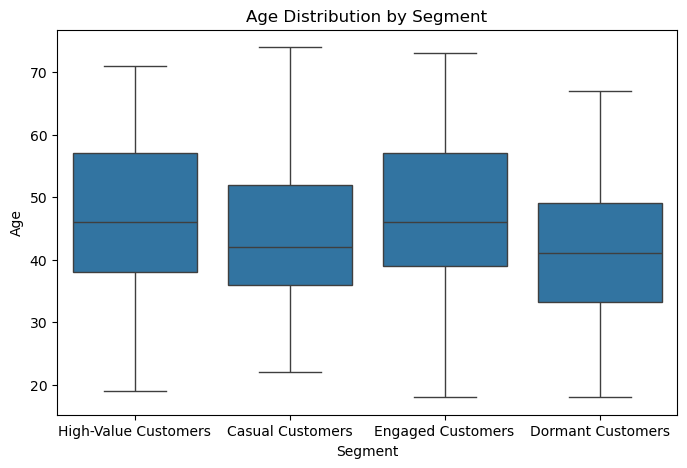

In [54]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='segment', y='age')
plt.title('Age Distribution by Segment')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.show()

In [55]:
# Summary singkat untuk personalized casual dan high value customer
focus_segments = ['High-Value Customers', 'Casual Customers']
age_focus = df[df['segment'].isin(focus_segments)][['segment', 'age']]
age_focus_summary = (
    age_focus.groupby('segment')['age']
    .agg(['count', 'min', 'mean', 'median', 'max'])
    .round(1)
)

age_focus_summary

,count,min,mean,median,max
segment,,,,,
Casual Customers,786,22,43.8,42.0,74
High-Value Customers,537,19,46.6,46.0,71


C:\Users\rafipriyahutama\AppData\Local\Temp\ipykernel_24476\2658496764.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=age_focus, x='segment', y='age', palette=['#4C72B0', '#C44E52'])


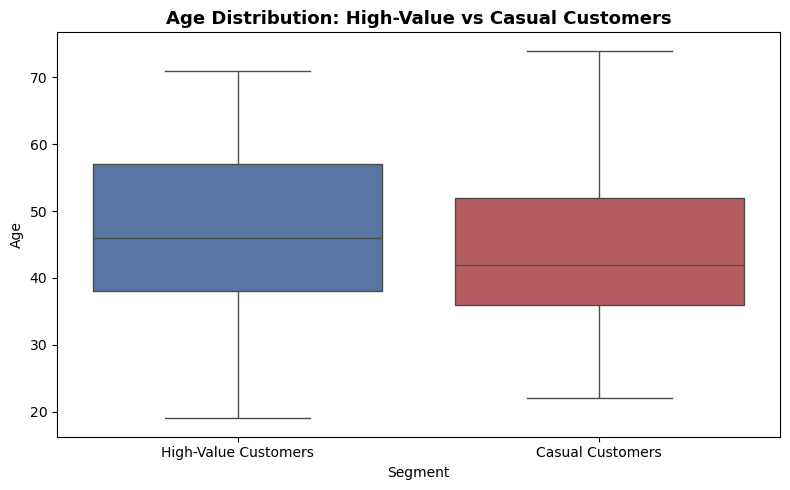

In [56]:
plt.figure(figsize=(8,5))
sns.boxplot(data=age_focus, x='segment', y='age', palette=['#4C72B0', '#C44E52'])
plt.title('Age Distribution: High-Value vs Casual Customers', fontsize=13, weight='bold')
plt.xlabel('Segment')
plt.ylabel('Age')
plt.tight_layout()
plt.show()

Sebaran data high value dan casual berada pada umur 40-50. ini tentu memudahkan kita dalam menentukan campaign tone.

Setelah mendapatkan gambaran umur, pada tahap selanjutnya saya akan melihat status household mereka.

In [57]:
# 1) hitung counts per (segment, household_type) dan persentase per segment
household_counts = df[df['segment'].isin(['High-Value Customers', 'Casual Customers'])] \
    .groupby(['segment','household_type']) \
    .size() \
    .reset_index(name='count')

# hitung total per segment lalu persen per row
household_counts['segment_total'] = household_counts.groupby('segment')['count'].transform('sum')
household_counts['pct'] = (household_counts['count'] / household_counts['segment_total'] * 100).round(1)

# pivot untuk kemudahan akses (baris = segment, kolom = household_type)
household_pivot = (
    household_counts
    .pivot(index='segment', columns='household_type', values='pct')
    .fillna(0)
)
household_pivot


household_type,Couple,Family,Single,Single Parent
segment,,,,
Casual Customers,8.5,57.4,6.0,28.1
High-Value Customers,32.6,32.4,19.6,15.5


In [58]:
# pastikan urutan kategori sama untuk kedua pie
categories = ['Family', 'Single Parent', 'Couple', 'Single']
colors = ['#55A868', '#8172B3', '#4C72B0', '#C44E52']
household_pivot = household_pivot[categories]




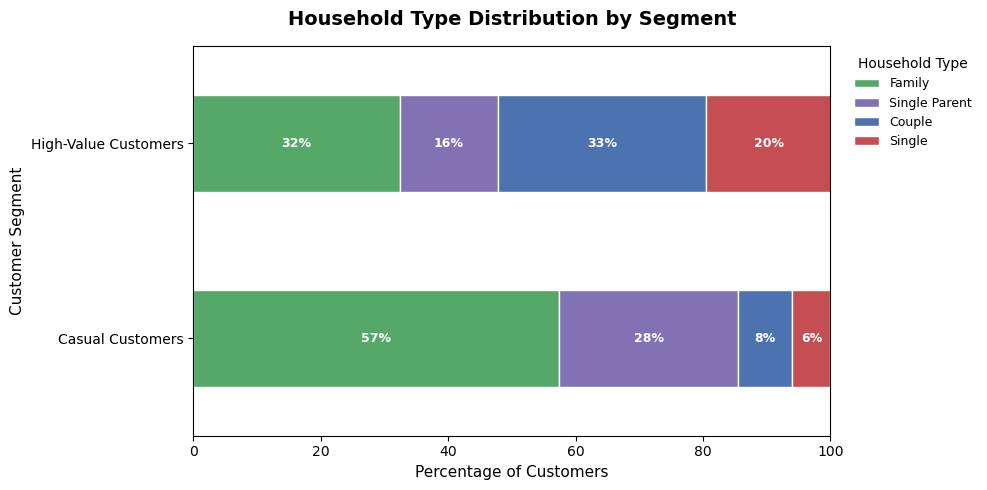

In [59]:
# --- Plot stacked bar ---
ax = household_pivot.plot(
    kind='barh',
    stacked=True,
    color=[colors[categories.index(col)] for col in categories],
    figsize=(10,5),
    edgecolor='white'
)
# --- Add percentage labels inside bars ---
for i, segment in enumerate(household_pivot.index):
    cumulative = 0
    for cat in categories:
        width = household_pivot.loc[segment, cat]
        if width > 4:
            ax.text(
                cumulative + width/2,
                i,
                f"{width:.0f}%",
                ha='center',
                va='center',
                color='white',
                fontsize=9,
                weight='bold'
            )
        cumulative += width

# --- Title & labels ---
plt.title('Household Type Distribution by Segment', fontsize=14, weight='bold', pad=15)
plt.xlabel('Percentage of Customers', fontsize=11)
plt.ylabel('Customer Segment', fontsize=11)
plt.xlim(0, 100)

# --- Legend in correct left-to-right order ---
handles, labels = ax.get_legend_handles_labels()
ordered = [labels.index(cat) for cat in categories]
plt.legend(
    [handles[i] for i in ordered],
    [labels[i] for i in ordered],
    title='Household Type',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()

In [60]:

focus_segments = ['High-Value Customers', 'Casual Customers']
household_focus = df[df['segment'].isin(focus_segments)][['segment', 'household_type']]
contingency_table = pd.crosstab(household_focus['segment'], household_focus['household_type'])

print("Contingency Table:\n")
print(contingency_table, "\n")
print("H0: Distribusi household type sama antara High-Value dan Casual customers")
print("H1: Distribusi Household type berbeda antara High-Value dan Casual customers\n")

chi2, p, dof, expected = st.chi2_contingency(contingency_table)


alpha = 0.05
if p < alpha:
   print('reject H0')
else:
    print("Accept h0")

Contingency Table:

household_type        Couple  Family  Single  Single Parent
segment                                                    
Casual Customers          67     451      47            221
High-Value Customers     175     174     105             83 

H0: Distribusi household type sama antara High-Value dan Casual customers
H1: Distribusi Household type berbeda antara High-Value dan Casual customers

reject H0


Distribusi keduanya berbeda. ketika menyusun analisis campaign, harus memperhatikan perbedaan ini

Mencari komposisi spending dari dua segmen target (high-value dan casual customer)

In [61]:
# --- Define product mapping and rename  ---
product_map = {
    'mntwines': 'Wines',
    'mntfruits': 'Fruits',
    'mntmeatproducts': 'Meat_Products',
    'mntfishproducts': 'Fish_Products',
    'mntsweetproducts': 'Sweet_Products',
    'mntgoldprods': 'Gold_Products'
}
df.rename(columns=product_map, inplace=True)

In [62]:
# --- Define product columns and segments of interest ---
product_cols = ['Wines', 'Fruits', 'Meat_Products', 'Fish_Products', 'Sweet_Products', 'Gold_Products']
focus_segments = ['High-Value Customers', 'Casual Customers']

# --- Melt data to long format ---
raw = (
    df.melt(
        id_vars='segment',
        value_vars=product_cols,
        var_name='product_category',
        value_name='spend'
    )
    .query("segment in @focus_segments")
)

# --- Aggregate total spend (sum) ---
sum_summary = (
    raw.groupby(['segment', 'product_category'], as_index=False)['spend'].sum()
)

# --- Ensure all combinations exist ---
full_index = pd.MultiIndex.from_product(
    [focus_segments, product_cols],
    names=['segment', 'product_category']
)
sum_summary = (
    sum_summary
    .set_index(['segment', 'product_category'])
    .reindex(full_index, fill_value=0)
    .reset_index()
)

# --- Calculate % share of total segment spend ---
sum_summary['pct'] = (
    sum_summary
    .groupby('segment')['spend']
    .transform(lambda x: x / x.sum() * 100)
    .round(1)
)

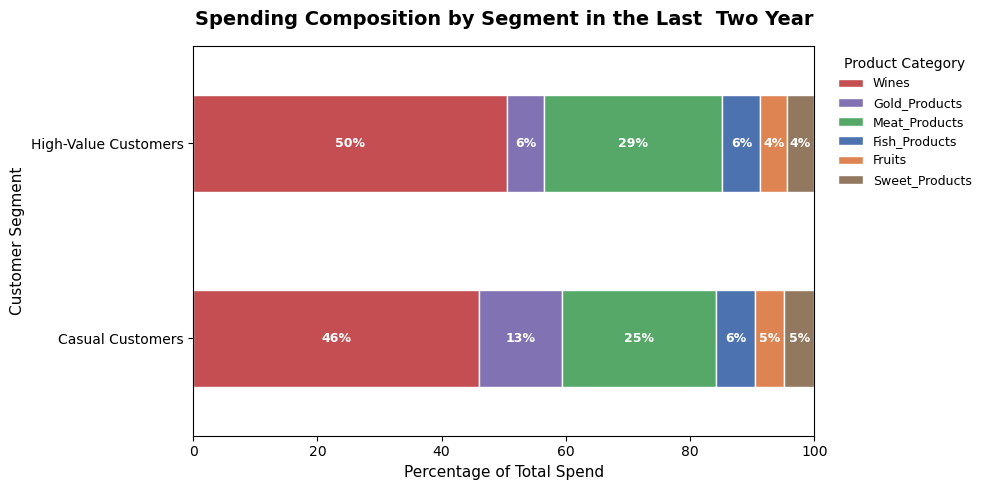

In [63]:

# --- Pivot for visualization ---
sum_pivot = (
    sum_summary
    .pivot(index='segment', columns='product_category', values='pct')
    .fillna(0)
    .round(1)
)

# --- Define colors and order ---
colors = {
    'Wines': '#C44E52',          
    'Gold_Products': '#8172B3',
    'Meat_Products': '#55A868',
    'Fish_Products': '#4C72B0',
    'Fruits': '#DD8452',
    'Sweet_Products': '#937860'
}
order = ['Wines', 'Gold_Products', 'Meat_Products', 'Fish_Products', 'Fruits', 'Sweet_Products']
sum_pivot = sum_pivot[order]

# --- Plot horizontal stacked bar ---
ax = sum_pivot.plot(
    kind='barh',
    stacked=True,
    color=[colors[col] for col in order],
    figsize=(10,5),
    edgecolor='white'
)

# --- Add percentage labels inside bars ---
for i, segment in enumerate(sum_pivot.index):
    cumulative = 0
    for cat in order:
        width = sum_pivot.loc[segment, cat]
        if width > 4:  # only label large enough segments
            ax.text(cumulative + width/2, i, f"{width:.0f}%", ha='center', va='center',
                    color='white', fontsize=9, weight='bold')
        cumulative += width

# --- Titles and styling ---
plt.title('Spending Composition by Segment in the Last  Two Year', fontsize=14, weight='bold', pad=15)
plt.xlabel('Percentage of Total Spend', fontsize=11)
plt.ylabel('Customer Segment', fontsize=11)
plt.xlim(0, 100)

plt.legend(
    title='Product Category',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


Keduanya memiliki pola yang mirip apabila ditinjau dari kategori barang. Kedunya memiliki porsi spending yang besar untuk kategori gold, meat, dan wines. tiga barang ini bisa dijadikan 'senjata' pada campaign selanjutnya.

**Purhcasing Channel**

In [64]:


# --- Melt channel data ---
channel_cols = ['numwebpurchases', 'numcatalogpurchases', 'numstorepurchases']
channel_map = {
    'numwebpurchases': 'Web Purchases',
    'numcatalogpurchases': 'Catalog Purchases',
    'numstorepurchases': 'Store Purchases'
}

channel_focus = (
    df.melt(
        id_vars='segment',
        value_vars=channel_cols,
        var_name='channel',
        value_name='count'
    )
    .query("segment in @focus_segments")
)

# --- Rename channels ---
channel_focus['channel'] = channel_focus['channel'].replace(channel_map)

# --- Sum total transactions per segment per channel ---
channel_summary = (
    channel_focus
    .groupby(['segment', 'channel'], as_index=False)['count']
    .sum()
)

# --- Calculate share within each segment ---
channel_summary['pct'] = (
    channel_summary
    .groupby('segment')['count']
    .transform(lambda x: x / x.sum() * 100)
    .round(1)
)

# --- Pivot for optional table view ---
channel_pivot = (
    channel_summary
    .pivot(index='segment', columns='channel', values='pct')
    .fillna(0)
    .round(1)
)

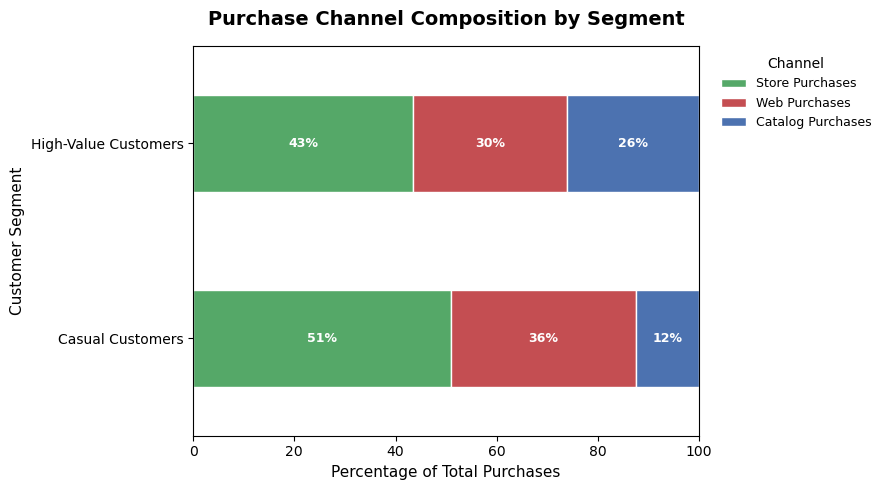

In [65]:
colors = {
    'Web Purchases': '#C44E52',      # red - online
    'Catalog Purchases': '#4C72B0',  # blue - remote
    'Store Purchases': '#55A868'     # green - offline
}
order = ['Store Purchases', 'Web Purchases', 'Catalog Purchases']

# --- Plot stacked horizontal bar ---
ax = channel_pivot[order].plot(
    kind='barh',
    stacked=True,
    color=[colors[col] for col in order],
    figsize=(9,5),
    edgecolor='white'
)
# --- Add percentage labels inside bars ---
for i, segment in enumerate(channel_pivot.index):
    cumulative = 0
    for col in order:
        width = channel_pivot.loc[segment, col]
        if width > 4:  # avoid clutter
            ax.text(cumulative + width/2, i, f"{width:.0f}%", ha='center', va='center', color='white', fontsize=9, weight='bold')
        cumulative += width
# --- Titles and labels ---
plt.title('Purchase Channel Composition by Segment', fontsize=14, weight='bold', pad=15)
plt.xlabel('Percentage of Total Purchases', fontsize=11)
plt.ylabel('Customer Segment', fontsize=11)
plt.xlim(0, 100)
# --- Legend ---
plt.legend(
    title='Channel',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    frameon=False,
    fontsize=9,
    title_fontsize=10
)

plt.tight_layout()
plt.show()


High value custemer memiliki tempat belanja (purhcasing channel) yang beragam. sedangkan casual custermer cenderung bebrbelanja di toko. konsekuensinya, campaign selanjutnya tidak boleh berfokus pada satu channel saja.

Income

In [66]:
income_focus = df[df['segment'].isin(focus_segments)][['segment', 'income']]
income_summary = (
    income_focus
    .groupby('segment')['income']
    .describe(percentiles=[.25, .5, .75])
    .round(1)
    .rename(columns={
        'mean': 'Mean',
        '50%': 'Median',
        'std': 'Std Dev',
        'min': 'Min',
        '25%': 'Q1',
        '75%': 'Q3',
        'max': 'Max'
    })
)[['count', 'Min', 'Q1', 'Median', 'Mean', 'Q3', 'Max', 'Std Dev']]
income_summary

,count,Min,Q1,Median,Mean,Q3,Max,Std Dev
segment,,,,,,,,
Casual Customers,786.0,5305.0,28445.8,37991.5,39136.8,48296.2,162397.0,15598.2
High-Value Customers,537.0,2447.0,62845.0,70924.0,70820.0,79607.0,160803.0,14104.0


C:\Users\rafipriyahutama\AppData\Local\Temp\ipykernel_24476\531808395.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


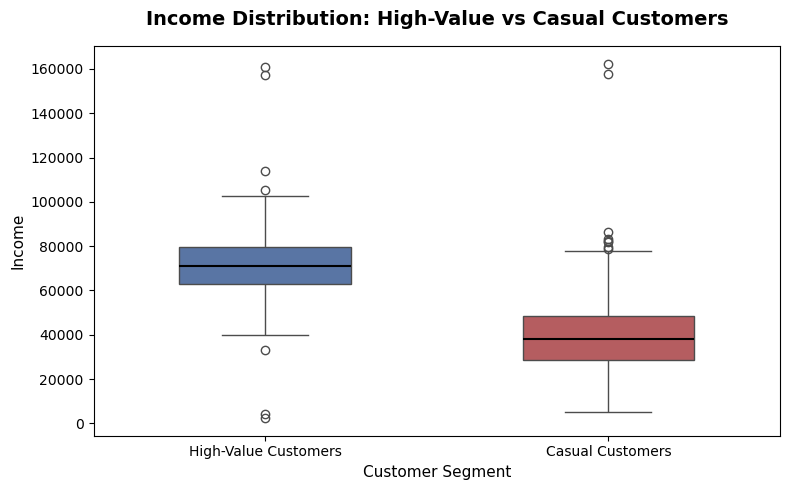

In [67]:
plt.figure(figsize=(8,5))
sns.boxplot(
    data=income_focus,
    x='segment',
    y='income',
    palette=['#4C72B0', '#C44E52'],
    medianprops={'color': 'black', 'linewidth': 1.5},
    width=0.5
)

plt.title('Income Distribution: High-Value vs Casual Customers', fontsize=14, weight='bold', pad=15)
plt.xlabel('Customer Segment', fontsize=11)
plt.ylabel('Income', fontsize=11)
plt.tight_layout()
plt.show()

In [68]:
df.columns

Index(['id', 'year_birth', 'education', 'marital_status', 'income', 'kidhome',
       'teenhome', 'dt_customer', 'recency', 'Wines', 'Fruits',
       'Meat_Products', 'Fish_Products', 'Sweet_Products', 'Gold_Products',
       'numdealspurchases', 'numwebpurchases', 'numcatalogpurchases',
       'numstorepurchases', 'numwebvisitsmonth', 'acceptedcmp3',
       'acceptedcmp4', 'acceptedcmp5', 'acceptedcmp1', 'acceptedcmp2',
       'complain', 'z_costcontact', 'z_revenue', 'last_campaign_response',
       'thn_dftr_cust', 'total_kids', 'household_type', 'monetary',
       'frequency', 'r_score', 'f_score', 'm_score', 'rfm_score', 'segment',
       'total_campaign_accept', 'responded', 'birth_year', 'age'],
      dtype='object')

In [69]:
#delete unused columns
df = df.drop(columns=['z_costcontact', 'z_revenue'])

In [70]:
df.to_excel('superstorecleaned.xlsx', index=False)